In [9]:
from keras import layers,models,optimizers

In [6]:
7*7*128+128

6400

Dropout layer added because of overfitting

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

#dropout - 50%
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [11]:
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### Data processing 

#### data augumentation

In [12]:
import os

In [21]:
train_dir = 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train'
validation_dir = 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\validation'

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

### Displaying some randomly augumented trainging images

In [29]:
train_cat_dir = 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats'

In [31]:
from keras.preprocessing import image

fnames = [os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)]

In [32]:
fnames

['C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.0.jpg',
 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.1.jpg',
 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.10.jpg',
 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.100.jpg',
 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.101.jpg',
 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.102.jpg',
 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.103.jpg',
 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\DL with keras\\dogs_vs_cats_small\\train\\cats\\cat.104.jpg',
 'C:\\Users\\

In [33]:
#choose one image
img_path = fnames[3]

#read the image and resize it
img = image.load_img(img_path, target_size = (150,150))

In [34]:
#converting image to array
x = image.img_to_array(img)

#reshapimg to (1,150,150,3)
x = x.reshape((1,)+ x.shape)

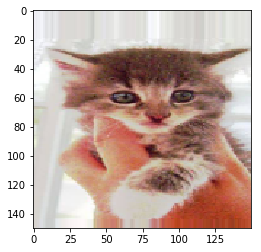

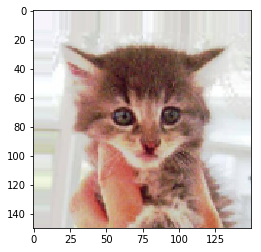

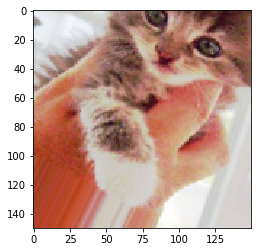

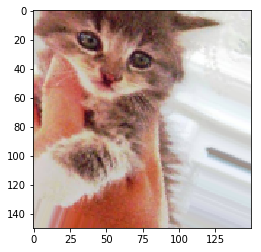

In [40]:
i = 0 
for batch in train_datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.img_to_array(batch[0]))
    i +=1
    if i % 4 == 0:
        break
plt.show()

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir, #Target directory
                                                       target_size=(150,150), #resizes all images to 150x150
                                                       batch_size = 20,
                                                       class_mode = 'binary') #because we use binary_crossentropy loss, we need binary lables


Found 2000 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 100,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 35s 355ms/step - loss: 0.6936 - acc: 0.5215 - val_loss: 0.6901 - val_acc: 0.5150
Epoch 2/100
100/100 [==============================] - 29s 287ms/step - loss: 0.6801 - acc: 0.5505 - val_loss: 0.6960 - val_acc: 0.5460
Epoch 3/100
100/100 [==============================] - 27s 275ms/step - loss: 0.6743 - acc: 0.5735 - val_loss: 0.6672 - val_acc: 0.5940
Epoch 4/100
100/100 [==============================] - 28s 278ms/step - loss: 0.6626 - acc: 0.5945 - val_loss: 0.6948 - val_acc: 0.5550
Epoch 5/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6439 - acc: 0.6265 - val_loss: 0.6495 - val_acc: 0.6000
Epoch 6/100
100/100 [==============================] - 28s 279ms/step - loss: 0.6250 - acc: 0.6340 - val_loss: 0.6056 - val_acc: 0.6550
Epoch 7/100
100/100 [==============================] - 28s 284ms/step - loss: 0.6138 - acc: 0.6575 - val_loss: 0.6059 - val_acc: 0.6620
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 29s 290ms/step - loss: 0.4414 - acc: 0.7920 - val_loss: 0.4814 - val_acc: 0.7920
Epoch 62/100
100/100 [==============================] - 29s 291ms/step - loss: 0.4447 - acc: 0.7880 - val_loss: 0.4930 - val_acc: 0.7840
Epoch 63/100
100/100 [==============================] - 29s 290ms/step - loss: 0.4408 - acc: 0.7945 - val_loss: 0.5177 - val_acc: 0.7730
Epoch 64/100
100/100 [==============================] - 29s 287ms/step - loss: 0.4454 - acc: 0.7910 - val_loss: 0.4744 - val_acc: 0.7750
Epoch 65/100
100/100 [==============================] - 29s 290ms/step - loss: 0.4347 - acc: 0.7995 - val_loss: 0.4567 - val_acc: 0.7920
Epoch 66/100
100/100 [==============================] - 28s 285ms/step - loss: 0.4344 - acc: 0.8025 - val_loss: 0.4497 - val_acc: 0.8010
Epoch 67/100
100/100 [==============================] - 28s 281ms/step - loss: 0.4214 - acc: 0.8065 - val_loss: 0.5404 - val_acc: 0.7690
Epoch 68/100
100/100 [===================

In [25]:
model.save('cats_and_dogs_small_dataaug.h5')

### Displaying results

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)


<Figure size 432x288 with 0 Axes>

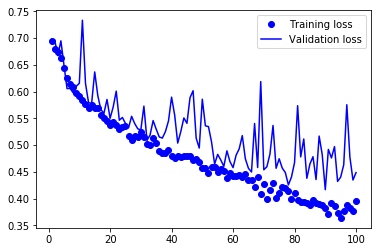

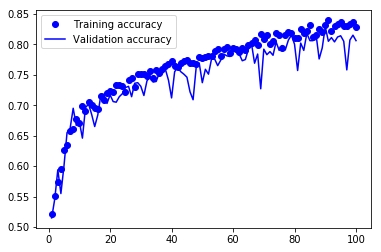

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs,loss, 'bo', label = 'Training loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation loss')
plt.legend()
plt.figure()

plt.plot(epochs,acc, 'bo', label = 'Training accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation accuracy')
plt.legend()
plt.figure()